# Complex projective coordinates on a 2-sphere

In this simple example, we use complex projective coordinates to parametrize a finite sample of a 2-sphere.

In [1]:
from dreimac import GeometryExamples, ComplexProjectiveCoords, ProjectiveMapUtils, PlotUtils
import numpy as np
from persim import plot_diagrams

The original data.

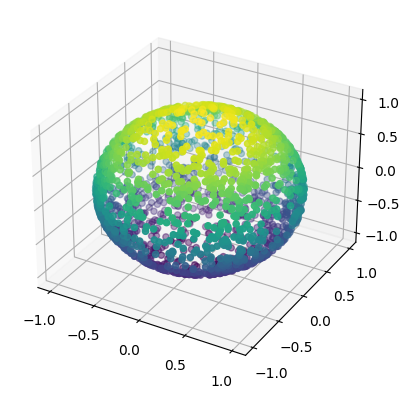

In [2]:
data = GeometryExamples.sphere(2000)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
_ = ax.scatter3D(data[:,0], data[:,1], data[:,2],s=20, c=data[:,2])

These are the two hemispheres of the original data.

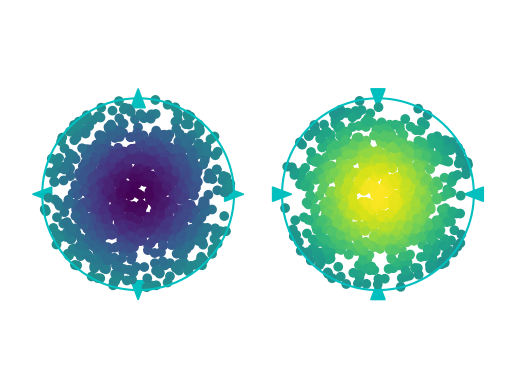

In [3]:
data_R2 = ProjectiveMapUtils.stereographic_projection_hemispheres(data)
fig = plt.figure()

plt.axis("off")
_ = PlotUtils.plot_2sphere_boundary()
plt.scatter(data_R2[:,0], data_R2[:,1],c=data[:,2])
_ = plt.axis("equal")

The persistent homology clearly shows one high-prominence two-dimensional void.

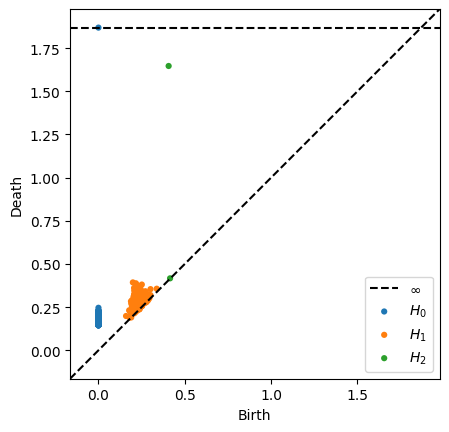

In [4]:
cpc = ComplexProjectiveCoords(data, n_landmarks=300)
fig = plt.figure()
plot_diagrams(cpc.dgms_)

We now apply complex projective coordinates, and display the data in two hemispheres as before. We color the data using the $z$-value of the original embedding, to make sure that our parametrization is continuous.

In [5]:
coords = cpc.get_coordinates(perc=0.9, proj_dim=1, standard_range=True, projective_dim_red_mode="exponential")
coords_R3 = ProjectiveMapUtils.hopf_map(coords)

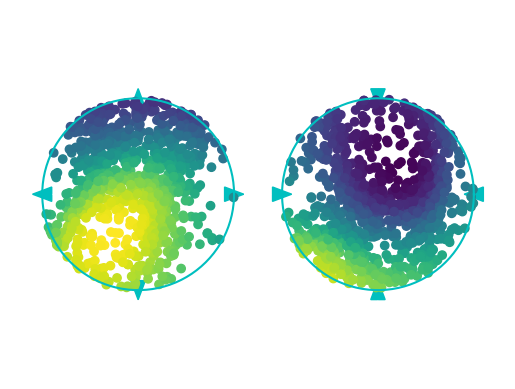

In [6]:
coords_R2 = ProjectiveMapUtils.stereographic_projection_hemispheres(coords_R3, center_vector=np.array([1,0,0.7]))
fig = plt.figure()
plt.axis("off")
_ = PlotUtils.plot_2sphere_boundary()
plt.scatter(coords_R2[:,0], coords_R2[:,1],c=data[:,2])
_ = plt.axis("equal")

The recovered paramtrization, but this time as a sphere in $\mathbb{R}^3$.

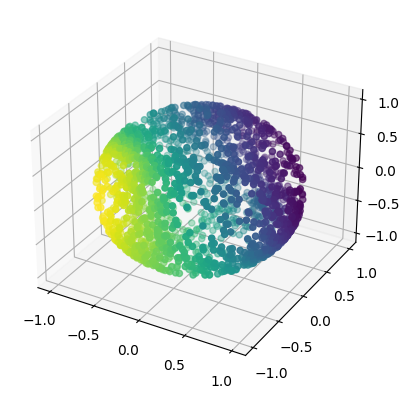

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
_ = ax.scatter3D(coords_R3[:,0], coords_R3[:,1], coords_R3[:,2],s=20, c=data[:,2])